In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


🚀 Đang load 100% dữ liệu vào RAM (Sẽ tốn khoảng 2-3GB RAM)...

📂 Processing Ankh (1536)...
   -> Shape: (82404, 768)

📂 Processing ESM2 (1280)...
   -> Shape: (82404, 1280)

📂 Processing ProtT5 (1024)...
   -> Shape: (82404, 1024)


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)



📊 BẢNG THỐNG KÊ CHÍNH XÁC (FULL DATA)
           Model          Shape    Mean    Std     Min    Max  \
0    Ankh (1536)   (82404, 768)  0.0000 0.0256 -0.8744 0.4819   
1    ESM2 (1280)  (82404, 1280) -0.0010 0.2086 -8.7185 1.9220   
2  ProtT5 (1024)  (82404, 1024) -0.0003    inf -0.7188 0.6685   

   Avg Norm (Quan trọng)  
0                 0.7030  
1                 7.3790  
2                 1.3320  
--------------------------------------------------------------------------------
⏳ Đang vẽ biểu đồ (Sẽ mất khoảng 30s)...


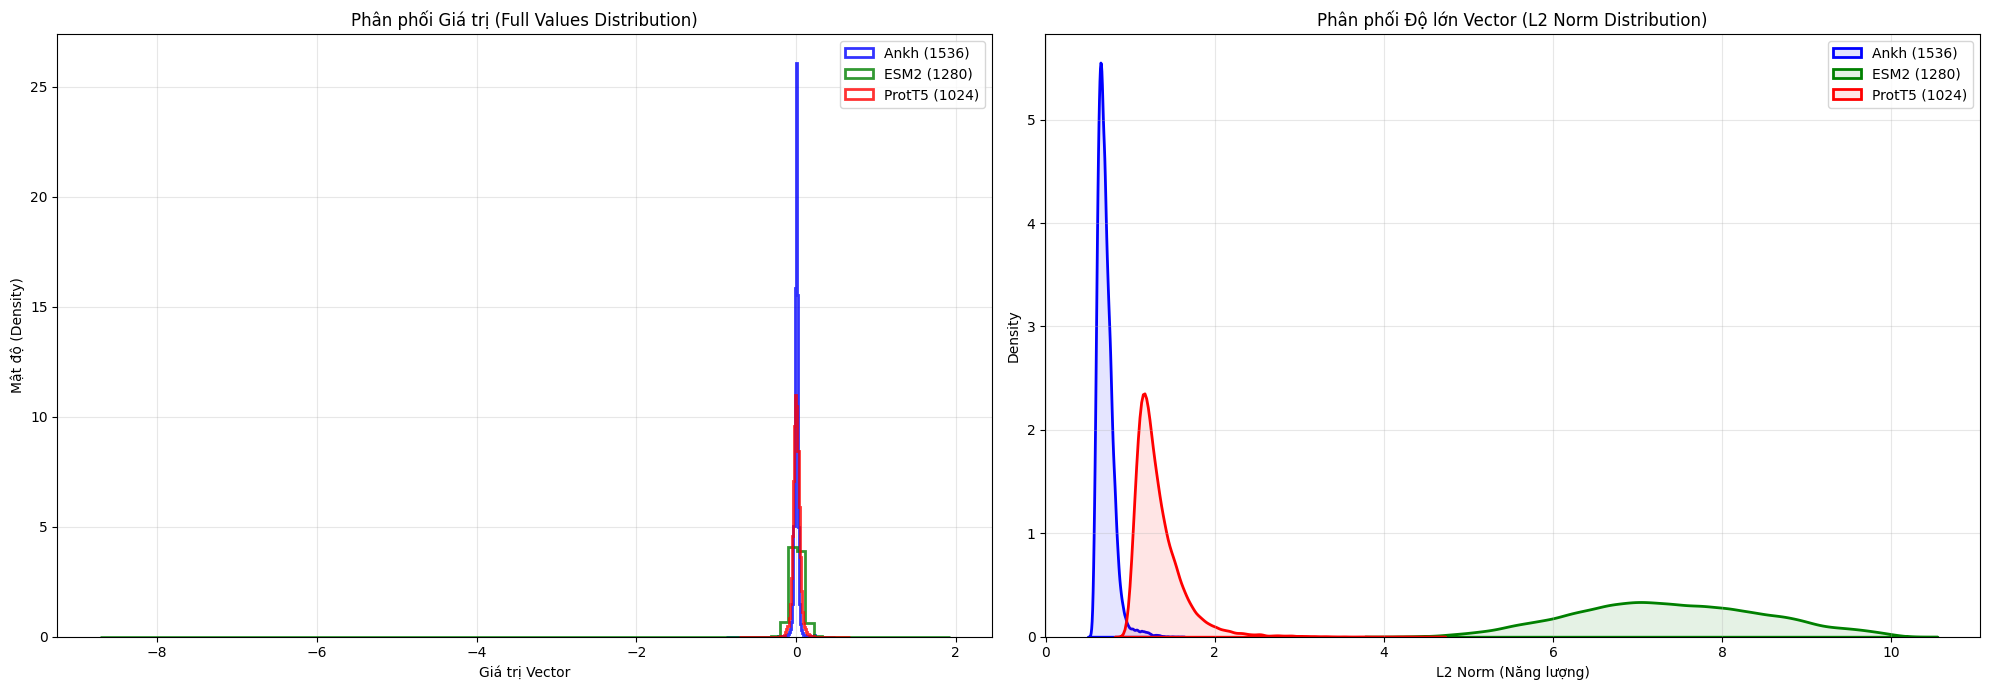

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==============================================================================
# 1. CẤU HÌNH (Đường dẫn chính xác của bạn)
# ==============================================================================
CONFIG = {
    'Ankh (1536)': {
        'path': '/content/drive/MyDrive/CAFA6_Embeddings/Final_Merged/ankh_train_FINAL_embeddings.npy',
        'color': 'blue'
    },
    'ESM2 (1280)': {
        'path': '/content/drive/MyDrive/CAFA6_Embeddings/ESM2_Aligned_Ankh/esm2_train_FINAL_embeddings.npy',
        'color': 'green'
    },
    'ProtT5 (1024)': {
        'path': '/content/drive/MyDrive/CAFA6_Embeddings/Prot_T5_Aligned/protT5_xl_train_FINAL_embeddings.npy',
        'color': 'red'
    },
}

# ==============================================================================
# 2. LOAD VÀ TÍNH TOÁN TRÊN TOÀN BỘ DỮ LIỆU
# ==============================================================================
stats_list = []
plot_data = {}

print("🚀 Đang load 100% dữ liệu vào RAM (Sẽ tốn khoảng 2-3GB RAM)...")

for name, info in CONFIG.items():
    print(f"\n📂 Processing {name}...")
    try:
        # Load toàn bộ file vào RAM
        data = np.load(info['path'])

        print(f"   -> Shape: {data.shape}")

        # 1. Tính Norm trên toàn bộ 80k dòng
        # axis=1: Tính độ dài từng vector protein
        norms = np.linalg.norm(data, axis=1)

        # 2. Flatten để lấy toàn bộ giá trị (khoảng 100 triệu điểm/model)
        # Bước này dùng để vẽ biểu đồ phân phối giá trị
        all_values = data.flatten()

        # 3. Tính thống kê chính xác tuyệt đối
        mean_val = np.mean(all_values)
        std_val  = np.std(all_values)
        min_val  = np.min(all_values)
        max_val  = np.max(all_values)
        avg_norm = np.mean(norms)

        stats_list.append({
            'Model': name,
            'Shape': data.shape,
            'Mean': mean_val,
            'Std': std_val,
            'Min': min_val,
            'Max': max_val,
            'Avg Norm (Quan trọng)': avg_norm
        })

        # Lưu lại để vẽ
        plot_data[name] = {
            'values': all_values, # Chứa hàng trăm triệu số
            'norms': norms,       # Chứa 80k số
            'color': info['color']
        }

        # Dọn dẹp biến tạm
        del data

    except Exception as e:
        print(f"❌ Lỗi: {e}")

# ==============================================================================
# 3. HIỂN THỊ KẾT QUẢ THỐNG KÊ
# ==============================================================================
df_stats = pd.DataFrame(stats_list)
pd.options.display.float_format = '{:.4f}'.format

print("\n" + "="*80)
print("📊 BẢNG THỐNG KÊ CHÍNH XÁC (FULL DATA)")
print("="*80)
print(df_stats)
print("-" * 80)

# ==============================================================================
# 4. VẼ BIỂU ĐỒ (HISTOGRAM CHO DỮ LIỆU LỚN)
# ==============================================================================
print("⏳ Đang vẽ biểu đồ (Sẽ mất khoảng 30s)...")
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# --- Biểu đồ 1: Phân phối Giá trị (Dùng Histogram vì dữ liệu quá lớn cho KDE) ---
# density=True để chuẩn hóa về cùng tỉ lệ so sánh
for name, d in plot_data.items():
    axes[0].hist(d['values'], bins=100, density=True,
                 histtype='step', linewidth=2,
                 color=d['color'], label=name, alpha=0.8)

axes[0].set_title('Phân phối Giá trị (Full Values Distribution)')
axes[0].set_xlabel('Giá trị Vector')
axes[0].set_ylabel('Mật độ (Density)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# --- Biểu đồ 2: Phân phối L2 Norm (KDE chạy tốt vì chỉ có 80k điểm) ---
for name, d in plot_data.items():
    sns.kdeplot(d['norms'], ax=axes[1], label=name, color=d['color'], fill=True, alpha=0.1, linewidth=2)

axes[1].set_title('Phân phối Độ lớn Vector (L2 Norm Distribution)')
axes[1].set_xlabel('L2 Norm (Năng lượng)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

In [5]:
import numpy as np

x = np.load('/content/drive/MyDrive/CAFA6_Embeddings/Prot_T5_Aligned/protT5_xl_train_FINAL_embeddings.npy', allow_pickle=True)

print("Shape:", x.shape)
print("Has INF:", np.isinf(x).any())
print("Has NAN:", np.isnan(x).any())


Shape: (82404, 1024)
Has INF: False
Has NAN: False


In [6]:
print("Min:", x.min())
print("Max:", x.max())
print("Abs max:", np.abs(x).max())


Min: -0.7188
Max: 0.6685
Abs max: 0.7188


In [7]:
print(np.std(x))


inf


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [8]:
print(x.shape)
print(x.size)


(82404, 1024)
84381696


In [9]:
print("dtype:", x.dtype)

dtype: float16


In [10]:
x = x.astype(np.float32)
std = np.std(x)


In [11]:
print(std)

0.042592485


In [12]:
import numpy as np

for name, cfg in CONFIG.items():
    print("====================================")
    print(f"Embedding: {name}")
    print(f"Path: {cfg['path']}")

    # Load file
    x = np.load(cfg['path'], allow_pickle=True)

    # Print basic info
    print("Shape:", x.shape)
    print("Dtype:", x.dtype)

    # Check values
    print("Min:", x.min())
    print("Max:", x.max())
    print("Has INF:", np.isinf(x).any())
    print("Has NAN:", np.isnan(x).any())

    # Quick std test (tránh crash với float16)
    try:
        print("Std (float32):", np.std(x.astype(np.float32)))
    except Exception as e:
        print("Error computing std:", e)

    print()


Embedding: Ankh (1536)
Path: /content/drive/MyDrive/CAFA6_Embeddings/Final_Merged/ankh_train_FINAL_embeddings.npy
Shape: (82404, 768)
Dtype: float32
Min: -0.8743717
Max: 0.48191747
Has INF: False
Has NAN: False
Std (float32): 0.025610145

Embedding: ESM2 (1280)
Path: /content/drive/MyDrive/CAFA6_Embeddings/ESM2_Aligned_Ankh/esm2_train_FINAL_embeddings.npy
Shape: (82404, 1280)
Dtype: float32
Min: -8.718539
Max: 1.9220425
Has INF: False
Has NAN: False
Std (float32): 0.20860402

Embedding: ProtT5 (1024)
Path: /content/drive/MyDrive/CAFA6_Embeddings/Prot_T5_Aligned/protT5_xl_train_FINAL_embeddings.npy
Shape: (82404, 1024)
Dtype: float16
Min: -0.7188
Max: 0.6685
Has INF: False
Has NAN: False
Std (float32): 0.042592485

